# General overview

In [173]:
import pandas as pd
import matplotlib 
df = pd.read_json('../Data/academia3.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   votes          1537 non-null   int64 
 1   answers_count  1537 non-null   int64 
 2   closed         1537 non-null   bool  
 3   title          1537 non-null   object
 4   views          1537 non-null   int64 
 5   tags           1537 non-null   object
 6   asked          1535 non-null   object
 7   post_text      1537 non-null   object
 8   comments       1381 non-null   object
 9   answers        1537 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 109.7+ KB


In [174]:
df['asked'] = pd.to_datetime(df['asked'],utc= True)


In [175]:
mask =(df['asked'] < pd.to_datetime('2020-01-01 00:00Z', utc=True))
limited = df.loc[mask]

## Number of question per year
from 2012 till 2018

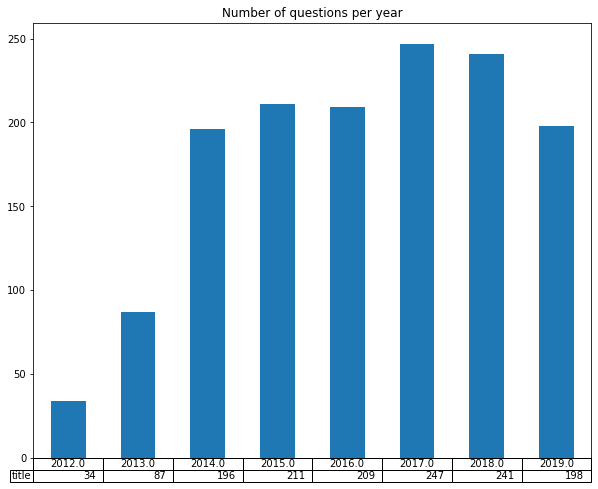

In [176]:
import matplotlib.pyplot as plt
trend_of_questions = limited['title'].groupby([df.asked.dt.year]).agg('count')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
trend_of_questions.plot(ax = ax1,x='asked', y='answer_count', kind ='bar', figsize=(10,8), table= True, legend= False)
plt.title('Number of questions per year')
plt.savefig('./figures/number_of_question_per_year.png', bbox_inches='tight')
plt.show()


## Avarage count of question from 2012 till 2019

In [177]:
limited_statistics = limited.groupby([df.asked.dt.month.rename('month')]).describe()
limited_statistics.columns


MultiIndex([(        'votes', 'count'),
            (        'votes',  'mean'),
            (        'votes',   'std'),
            (        'votes',   'min'),
            (        'votes',   '25%'),
            (        'votes',   '50%'),
            (        'votes',   '75%'),
            (        'votes',   'max'),
            ('answers_count', 'count'),
            ('answers_count',  'mean'),
            ('answers_count',   'std'),
            ('answers_count',   'min'),
            ('answers_count',   '25%'),
            ('answers_count',   '50%'),
            ('answers_count',   '75%'),
            ('answers_count',   'max'),
            (        'views', 'count'),
            (        'views',  'mean'),
            (        'views',   'std'),
            (        'views',   'min'),
            (        'views',   '25%'),
            (        'views',   '50%'),
            (        'views',   '75%'),
            (        'views',   'max')],
           )

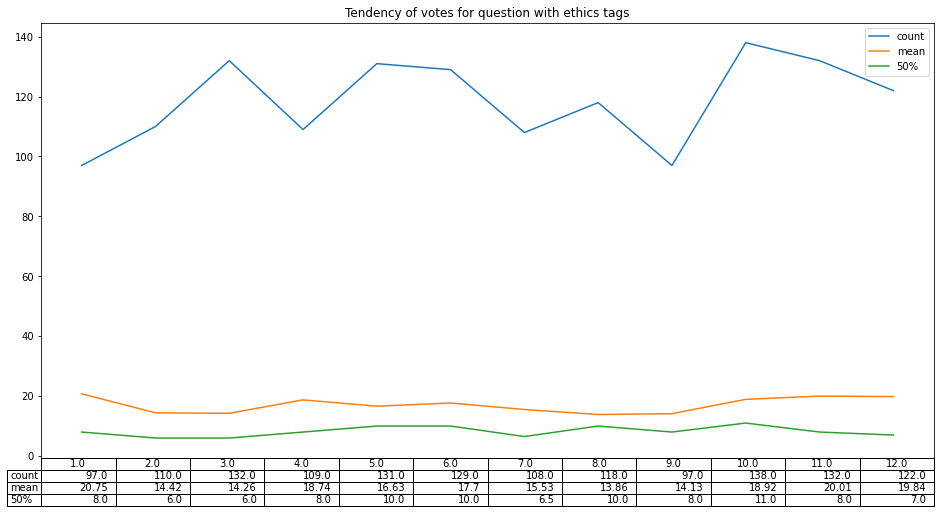

In [178]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

x_axis = ax.axes.get_xaxis()
ax.xaxis.tick_top()
x_axis.set_visible(False)
d = limited_statistics['votes'][['count','mean','50%']]
d.plot(ax=ax, title='Tendency of votes for question with ethics tags', table = np.round(d.T,2))
plt.savefig('./figures/tendency_of_votes_ethic.png', bbox_inches = 'tight')

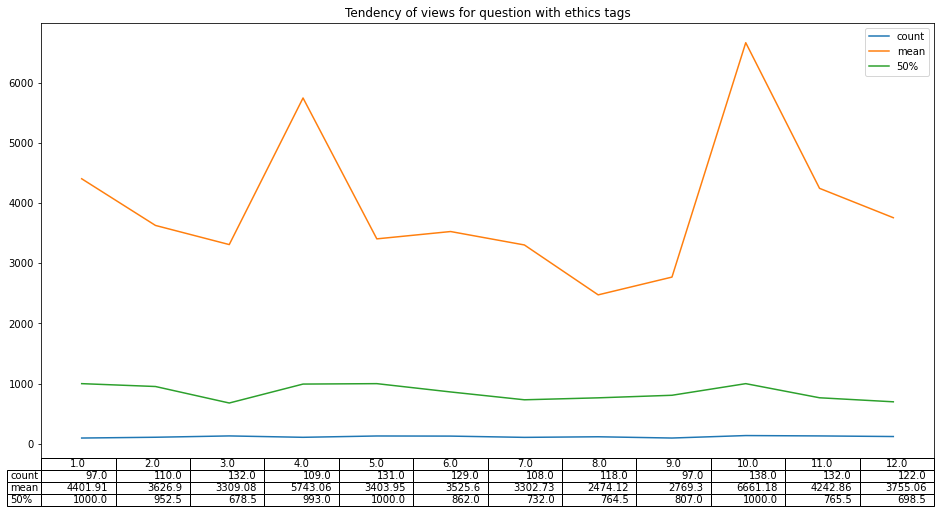

In [179]:
fig, ax = plt.subplots(1, 1)
d = limited_statistics['views'][['count','mean','50%']]
x_axis = ax.axes.get_xaxis()
ax.xaxis.tick_top()
x_axis.set_visible(False)
d.plot( figsize=(16,8), title='Tendency of views for question with ethics tags',ax = ax,
                                                         table = np.round(d.T,2)
                                                         )
plt.savefig('./figures/tendency_of_views_ethic.png', bbox_inches = 'tight')

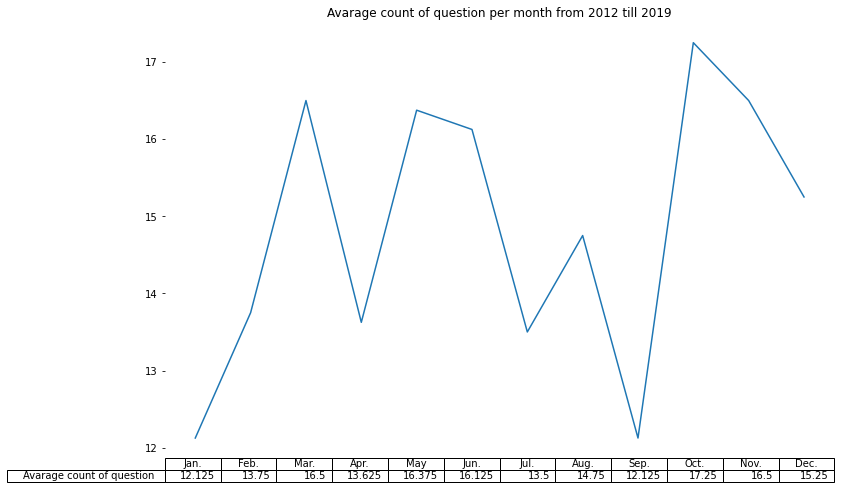

In [180]:
from pandas.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
avarege_q_month = limited['title'].groupby([df.asked.dt.month.rename('month')]).agg(count ='count')
avarege_q_month = avarege_q_month['count']/8
avarege_q_month

avarege_q_month = avarege_q_month.rename('Avarage count of question')
idx = {1.0:'Jan.',2.0: 'Feb.',3.0: 'Mar.',4.0: 'Apr.',5.0: 'May',6.0:'Jun.',7.0:'Jul.',8.0: 'Aug.',9.0: 'Sep.', 10.0:'Oct.',11.0:'Nov.', 12.0:'Dec.'}

avarege_q_month = avarege_q_month.rename(index = idx)
avarege_q_month.plot(table= True, figsize=(12,8), use_index = True, title ='Avarage count of question per month from 2012 till 2019',
                   )
plt.savefig('figures/a_n_count.png', bbox_inches = 'tight')



## Count of question in year 2020
possible impact of coronavirus on number of question

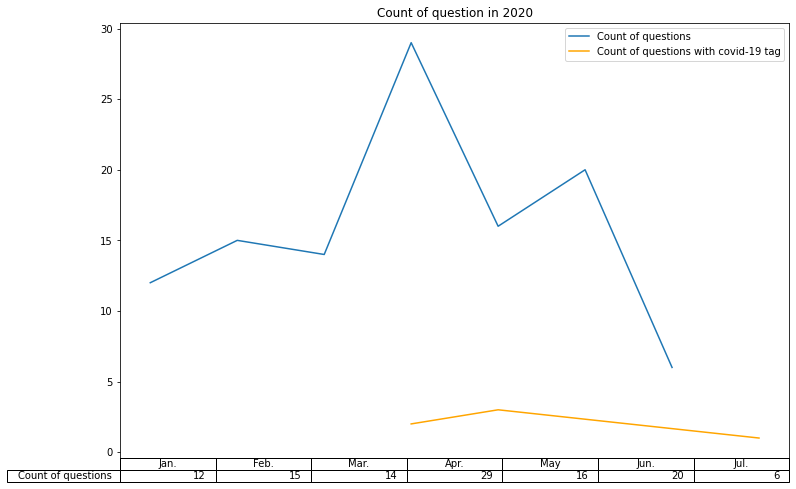

In [181]:
data2020= df.loc[(df['asked'] > pd.to_datetime('2020-01-01 00:00Z', utc=True))]
data2020 = data2020['title'].groupby([df.asked.dt.month.rename('month')]).agg(count = 'count')

coronadata = df.loc[df.apply(lambda x :  'covid-19' in x['tags'],axis=1)]['title'].groupby([df.asked.dt.month.rename('month')]).agg(count = 'count')
coronadata = coronadata.rename(columns = {'count':'Count of questions with covid-19 tag'})

idx = {1.0:'Jan.',2.0: 'Feb.',3.0: 'Mar.',4.0: 'Apr.',5.0: 'May',6.0:'Jun.',7.0:'Jul.'}
data2020 = data2020.rename(index = idx,columns = {'count':'Count of questions'})
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
data2020.plot(ax = ax1,table= True, figsize=(12,8), title ='Count of question in 2020', legend = True,)
coronadata.plot(ax = ax1, figsize=(12,8), title ='Count of question in 2020', legend = True,color= 'orange')
# where df is your data frame
plt.savefig('./figures/tabl2020withcorona.png', bbox_inches='tight',)


# s = pd.Series([0,0],index = [1,2])
# coronadata.append(pd.Series({'Count of questions with covid-19 tag' : 0},name = 1.0))
# coronadata.append(pd.Series({'Count of questions with covid-19 tag' : 0},name = 2.0))

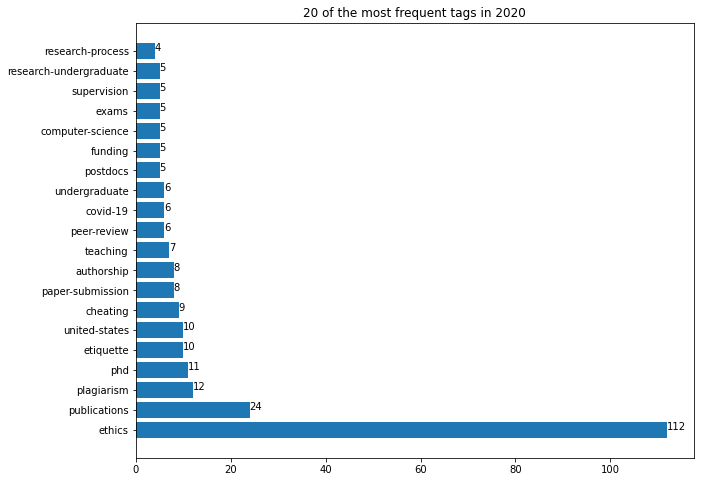

In [182]:
import collections
top = 20
all_tags = []
data2020= df.loc[(df['asked'] > pd.to_datetime('2020-01-01 00:00Z', utc=True))]
for a in data2020['tags']:
    all_tags += a

cnt_all = collections.Counter(all_tags)
cnt_all.most_common()

commont_dict ={}

for w,f in cnt_all.most_common():
    commont_dict[w] = f
    n = 20
    
df_coocurences = pd.DataFrame.from_dict(dict(cnt_all), columns=[ 'Number of occurences'], orient='index')
df_coocurences.sort_values(by='Number of occurences',ascending = False, inplace= True)
# df_coocurences.head(15).plot(kind = 'barh', figsize=(10,10))
data = df_coocurences.head(n)
plt.figure(figsize=(10,8))
plt.barh(data.index,data['Number of occurences'])

plt.title(str(n)+' of the most frequent tags in 2020')
for index, value in enumerate(data['Number of occurences']):
    plt.text(value, index, str(value))
plt.savefig('./figures/most_frequenta_tagsin2020',bbox_inches='tight')

## The most frequent tags in question

In [183]:
import collections
top = 20
all_tags = []
for a in df['tags']:
    all_tags += a

cnt_all = collections.Counter(all_tags)
cnt_all.most_common()

commont_dict ={}

for w,f in cnt_all.most_common():
    commont_dict[w] = f
    


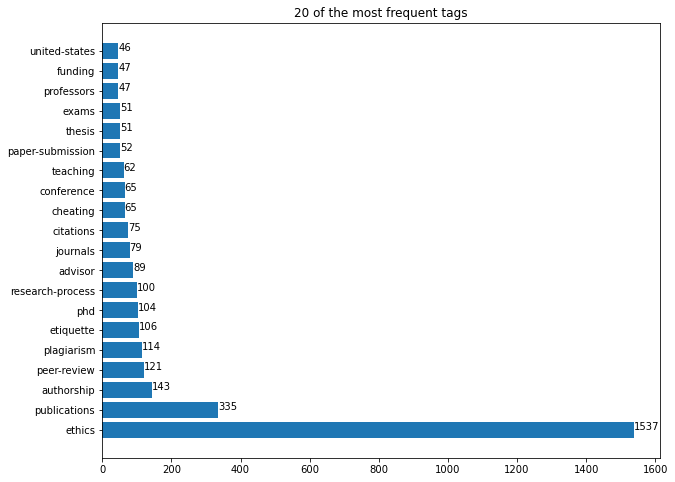

In [184]:
n = 20
df_coocurences = pd.DataFrame.from_dict(dict(cnt_all), columns=[ 'Number of occurences'], orient='index')
df_coocurences.sort_values(by='Number of occurences',ascending = False, inplace= True)
# df_coocurences.head(15).plot(kind = 'barh', figsize=(10,10))
data = df_coocurences.head(n)
plt.figure(figsize=(10,8))
plt.barh(data.index,data['Number of occurences'])

plt.title(str(n)+' of the most frequent tags')
for index, value in enumerate(data['Number of occurences']):
    plt.text(value, index, str(value))
plt.savefig('./figures/most_frequenta_tags',bbox_inches='tight')

## Function for WordCloud, possibly used for presentation


In [185]:
from wordcloud import WordCloud
def word_cloud(data_dict, name):
    cloud = WordCloud(
            background_color='white',
            width=2500,
            height=1800,
            max_words=top,
            min_font_size=25,
            colormap='tab10',
            color_func=lambda *args, **kwargs: "black",
            prefer_horizontal=1.0)
    cloud.generate_from_frequencies(data_dict)
    plt.imshow(cloud)
    plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.savefig('./figures/' + name)
    plt.show()

In [186]:
import json
with open("most_common_tags.json", "w") as fp:
    json.dump(commont_dict,fp) 


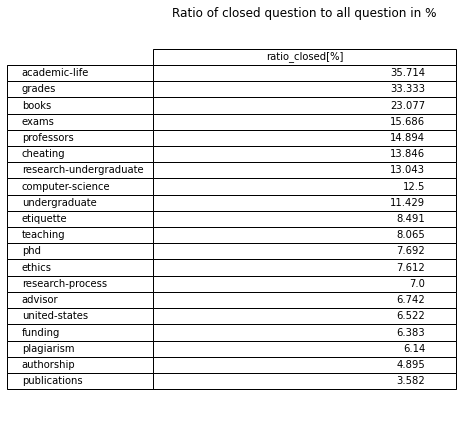

In [187]:

import collections
top = 20
all_tags = []

for a in df.loc[df['closed'] == True]['tags']:
    all_tags += a

cnt = collections.Counter(all_tags)

closed = {}
for w,f in cnt.most_common(top):
    closed[w] = f

closed_ratio = pd.DataFrame(index = closed.keys())
closed_value = [v for k,v in closed.items()]
all_value = [ cnt_all[k] for k in closed.keys()]
closed_ratio['closed'] = closed_value
closed_ratio['count'] = all_value
closed_ratio['ratio_closed[%]'] = round(closed_ratio['closed']/closed_ratio['count'] *100,3)
closed_ratio = closed_ratio.sort_values(by='ratio_closed[%]', ascending = False)


plt.figure(figsize=(4,8))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

t = table(ax, closed_ratio['ratio_closed[%]'],loc = 'center')  # where df is your data frame
t.set_fontsize(10)
t.scale(1.5, 1.5) 
plt.subplots_adjust(left=0.2, bottom=0.2,)
plt.title('Ratio of closed question to all question in %')
plt.savefig('./figures/ratio_of_closed.png',bbox_inches='tight')


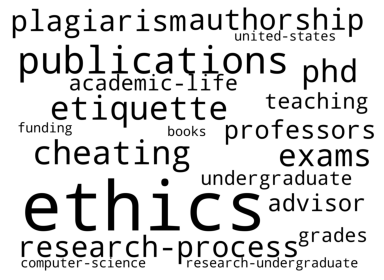

In [188]:
word_cloud(closed,'closed_wc.png')

## Basic statistics for answercount, votes, views

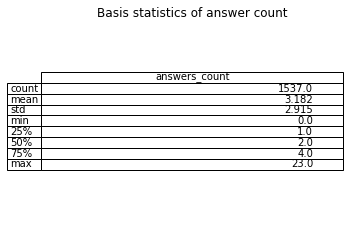

In [189]:

d = df['answers_count'].describe()
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, np.round(d,3),loc = 'center')  # where df is your data frame
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Basis statistics of answer count')
plt.savefig('./figures/basic_answer_count.png')



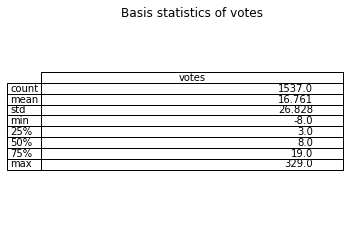

In [190]:
d = df['votes'].describe()
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, np.round(d,3),loc = 'center')  # where df is your data frame
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Basis statistics of votes')
plt.savefig('./figures/basic_votes.png')


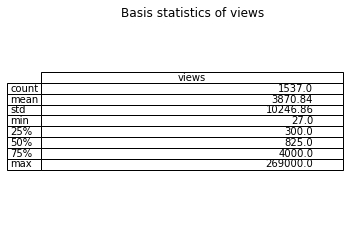

In [191]:
d = df['views'].describe()
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, np.round(d,3),loc = 'center')  # where df is your data frame
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Basis statistics of views')
plt.savefig('./figures/basic_answer_views.png')

## Rate of positively and negative evalueted question for N od most frequent tags

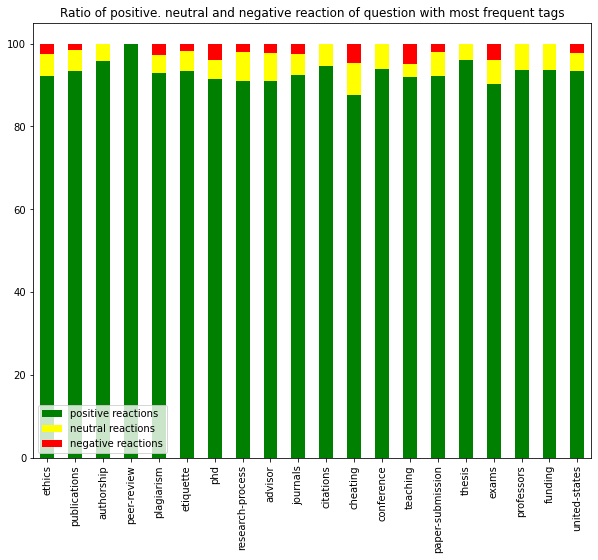

In [192]:
import json
all_tags = []
for a in df.loc[df['votes']> 0]['tags']:
    all_tags += a
cnt_positive = collections.Counter(all_tags)
cnt_positive.most_common(10)
positive_dict = {}
for w,f in cnt_positive.most_common():
    positive_dict[w] = f



all_tags = []
for a in df.loc[df['votes']< 0]['tags']:
    all_tags += a  
cnt_negative = collections.Counter(all_tags)

negative_dict = {}
for w,f in cnt_negative.most_common():
    negative_dict[w] = f

result = {}
for k, v in commont_dict.items():
    neg_rate = 0
    pos_rate = 0
    if k in negative_dict.keys():
        neg_rate = (negative_dict[k] / v)*100
    if k in positive_dict.keys():
        pos_rate = (positive_dict[k] / v) *100
    neut_rate = 100 - neg_rate - pos_rate
    result[k] = {
        'positive reactions' : round(pos_rate,2),
        'neutral reactions' :round(neut_rate,2),
        'negative reactions': round(neg_rate,2)
    }
    
n_most_frequent_tags = data.index
with open('most_frequent_tags.json','w') as f:
    json.dump(n_most_frequent_tags.tolist(),f, ensure_ascii = False)

result_for_n = { your_key: result[your_key] for your_key in n_most_frequent_tags }
result_for_n = pd.DataFrame.from_dict(result_for_n, orient='index')
result_for_n['idx'] = result_for_n.index
ax = result_for_n['positive reactions'].plot( kind="bar", color='green', figsize=(10,8), title='Ratio of positive. neutral and negative reaction of question with most frequent tags',
                                            legend= True)
result_for_n['neutral reactions'].plot(kind='bar', color='yellow',bottom=result_for_n['positive reactions'],legend= True)
result_for_n['negative reactions'].plot(kind='bar', color='red', bottom=result_for_n['neutral reactions']+result_for_n['positive reactions'],
                                       legend= True)

plt.savefig('./figures/ratio_ofreaction_on question.png')

## Avarage amount of question per tag

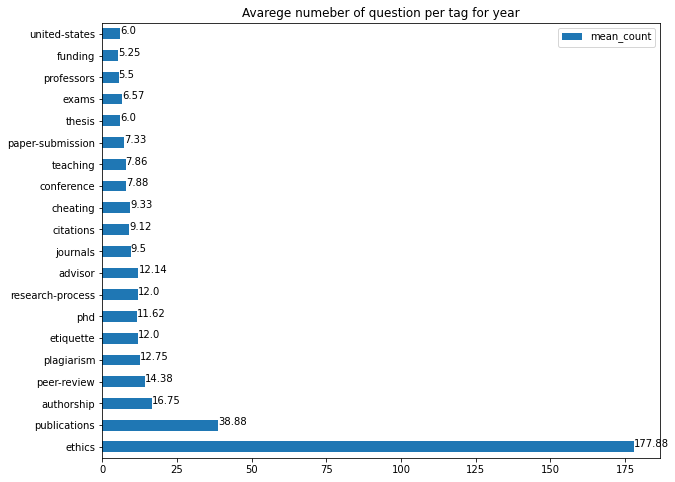

In [193]:
mask =(df['asked'] < pd.to_datetime('2020-01-01 00:00Z', utc=True))
limited = df.loc[mask]
avarege_tags_ammount_per_tag = pd.DataFrame()
for n in n_most_frequent_tags.to_list():
    mean = limited.loc[df.apply(lambda x :  n in x['tags'],axis=1)].groupby([df.asked.dt.year])['views'].count().mean()
    avarege_tags_ammount_per_tag = avarege_tags_ammount_per_tag.append(pd.Series({'mean_count' : mean}, name = n))
avarege_tags_ammount_per_tag.plot(kind ='barh', figsize = (10,8))

plt.title('Avarege numeber of question per tag for year')
for index, value in enumerate(np.round(avarege_tags_ammount_per_tag['mean_count'],2)):
    plt.text(value, index, str(value))
plt.savefig('./figures/avarage_number_most_frequent',bbox_inches='tight')

## Basic Statistics of views for every tag

In [194]:
import itertools
import numpy as np
unique_tags = np.unique([*itertools.chain.from_iterable(df.tags)])

avarage_views_per_tag = pd.DataFrame()
for t in unique_tags:
    mask = df.tags.apply(lambda x:  t in x)
    subset_df = df[mask]

    description = subset_df['views'].describe()
    avarage_views_per_tag[t] = description
    
avarage_views_per_tag = avarage_views_per_tag.T
avarage_views_per_tag['tag'] = avarage_views_per_tag.index
avarage_views_per_tag.sort_values(by=['50%','mean'], ascending = False)

avarage_views_per_tag.loc['publications',:]


count             335
mean          2512.99
std           4945.72
min                31
25%             276.5
50%               717
75%              3000
max             50000
tag      publications
Name: publications, dtype: object

## How statistic for tags have changed in time


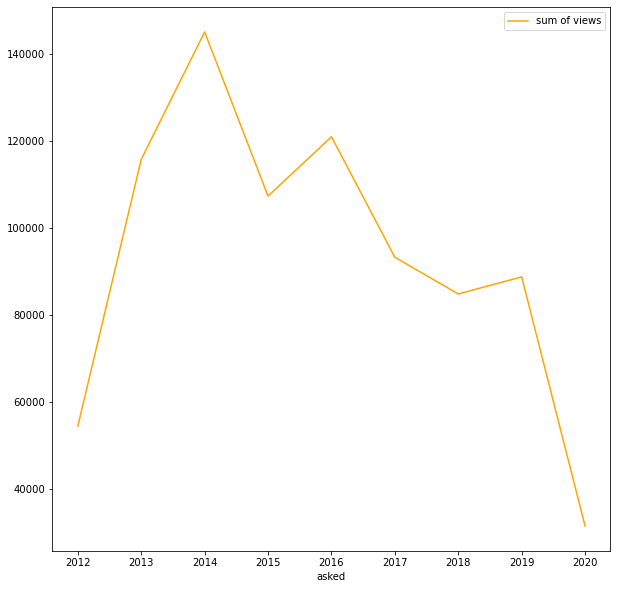

In [195]:
item = 'publications'
pub_views = df.loc[df.apply(lambda x :  item in x['tags'],axis=1)].groupby([df.asked.dt.year])['views'].sum()
pub_views = pub_views.rename('sum of views')
pub_count = df.loc[df.apply(lambda x :  item in x['tags'],axis=1)].groupby([df.asked.dt.year])['title'].count()
pub_count = pub_count.rename('count of question')

ax = pub_views.plot(color = 'orange', legend = True, figsize = (10,10))
# pub_count.plot(color = 'blue', figsize = (10,10), legend = True, title = 'Tendency of questions number and number of its view for question with tag ' + item)
# plt.savefig('./figures/tendecy_publications.png',bbox_inches = 'tight')


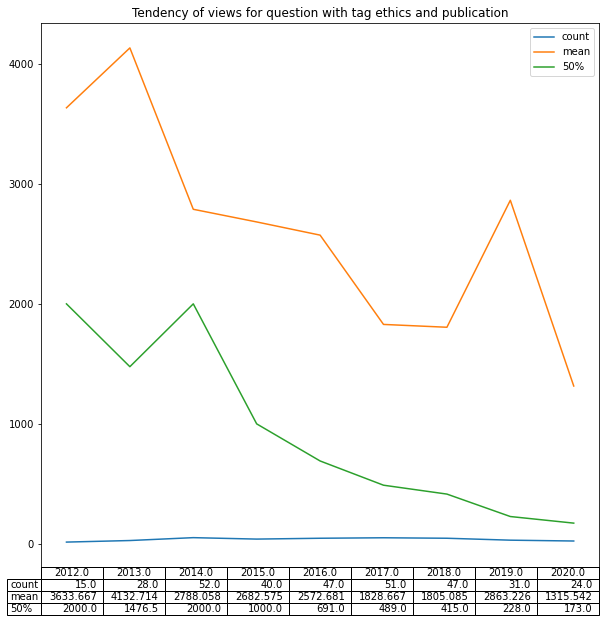

In [196]:
fig, ax = plt.subplots(1, 1)
views_describe = df.loc[df.apply(lambda x :  item in x['tags'],axis=1)].groupby([df.asked.dt.year])['views'].describe()
d = views_describe[['count','mean','50%']]

x_axis = ax.axes.get_xaxis()
ax.xaxis.tick_top()
x_axis.set_visible(False)
d.plot(ax = ax , figsize =(10,10),
                                            title = 'Tendency of views for question with tag ethics and publication',
                                           table = np.round(d.T,3))
plt.savefig('./figures/t_vies_publications',bbox_inches = 'tight')

## Avarage nuber of views, answers, and votes for n most frequent


In [197]:
most_popular = pd. DataFrame()
for t in n_most_frequent_tags.to_list():
    mean_views = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['views'].mean()
    mean_answers_count =  df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['answers_count'].mean()
    mean_votes = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['votes'].mean()
    most_popular = most_popular.append(pd.Series({'mean_views': mean_views, 'mean_answer_count' : mean_answers_count, 'mean_votes' : mean_votes},name = t))
most_popular




,mean_answer_count,mean_views,mean_votes
ethics,3.181522,3870.839948,16.760573
publications,2.549254,2512.994030,14.707463
authorship,2.846154,3019.132867,16.629371
peer-review,3.446281,3452.710744,24.793388
plagiarism,3.394737,5252.894737,24.298246
etiquette,3.264151,3869.622642,14.811321
phd,3.057692,3975.875000,18.105769
research-process,2.320000,2020.760000,11.730000
advisor,3.044944,3969.438202,21.471910
journals,2.696203,2391.101266,16.569620


,mean_answer_count,mean_views,mean_votes
cheating,5.923077,15723.630769,32.784615
exams,5.313725,15497.274510,26.843137
teaching,4.887097,6947.048387,25.516129
united-states,4.413043,6220.869565,25.760870
professors,3.468085,4672.553191,18.000000
peer-review,3.446281,3452.710744,24.793388
plagiarism,3.394737,5252.894737,24.298246
etiquette,3.264151,3869.622642,14.811321
ethics,3.181522,3870.839948,16.760573
thesis,3.156863,3814.882353,16.509804


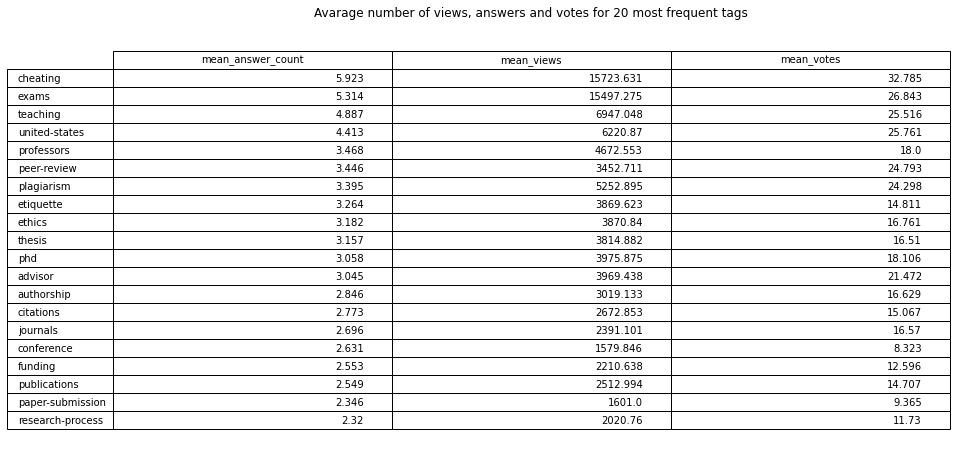

In [198]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

d = most_popular.sort_values(by = 'mean_answer_count', ascending= False)
plt.figure(figsize=(10,8))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

t = table(ax, np.round(d,3),loc = 'center')  # where df is your data frame
t.set_fontsize(10)
t.scale(1.5, 1.5) 
# plt.subplots_adjust(left=0.2, bottom=0.2,)
plt.title('Avarage number of views, answers and votes for 20 most frequent tags')
plt.savefig('./figures/popular_n_tags.png',bbox = 'tight')
d.style.apply(highlight_max)

## Comments count analyse

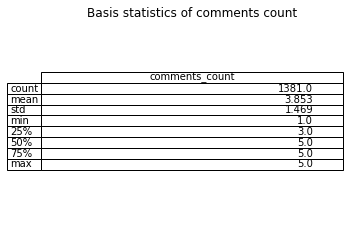

In [203]:
df['comments_count'] = df['comments'].str.len()
d = df['comments_count']. describe()

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, np.round(d,3),loc = 'center')  # where df is your data frame
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Basis statistics of comments count')
plt.savefig('./figures/basic_commnets_count.png')


In [219]:
comments_count_df = pd.DataFrame()
for t in list(set(all_tags)):
    suma = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['comments_count'].sum()
    mean = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['comments_count'].mean()
    count = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['comments_count'].count()
    comments_count_df = comments_count_df.append(pd.Series({'sum comments count': np.round(suma,3), 'mean comments count' : np.round(mean,3), 'count of question with a comment':count}, name = t))
comments_count_df

,count of question with a comment,mean comments count,sum comments count
copyright,20.0,4.100,82.0
journals,71.0,3.944,280.0
teaching,57.0,4.281,244.0
legal-issues,36.0,4.278,154.0
grades,12.0,4.417,53.0
writing,12.0,3.917,47.0
psychology,3.0,4.000,12.0
paper-submission,42.0,3.571,150.0
academic-life,14.0,2.929,41.0
phd,93.0,3.634,338.0


In [225]:
comments_count_df = comments_count_df.sort_values(by='count of question with a comment', ascending= False)
comments_count_df.head(20)
comments_count_df.head(20).style.apply(highlight_max)

,count of question with a comment,mean comments count,sum comments count
ethics,1381.000000,3.853000,5321.000000
publications,297.000000,3.626000,1077.000000
plagiarism,106.000000,4.038000,428.000000
phd,93.000000,3.634000,338.000000
etiquette,90.000000,3.844000,346.000000
research-process,87.000000,4.138000,360.000000
advisor,80.000000,3.988000,319.000000
journals,71.000000,3.944000,280.000000
cheating,62.000000,4.274000,265.000000
teaching,57.000000,4.281000,244.000000


In [218]:
list(set(all_tags))


['copyright',
 'journals',
 'teaching',
 'legal-issues',
 'grades',
 'writing',
 'psychology',
 'paper-submission',
 'academic-life',
 'phd',
 'publications',
 'university',
 'etiquette',
 'plagiarism',
 'courses',
 'personal-misconduct',
 'answering-questions',
 'united-states',
 'outward-appearance',
 'exams',
 'grading',
 'research-undergraduate',
 'research-misconduct',
 'harassment',
 'conflict-of-interest',
 'online-learning',
 'administration',
 'research-process',
 'assessment',
 'lecturer',
 'retraction',
 'ethics',
 'advisor',
 'masters',
 'anonymity',
 'cheating']